In [145]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn import preprocessing

In [146]:
df = pd.read_csv("data/dynamics/p.csv")
# 最初の10個はデータが死んでる
df = df[10:]

data = df.filter(like="point", axis=1).values.T
t_num = data.shape[1]
t = range(t_num)
point_num = data.shape[0]

# 正規化
ss = preprocessing.StandardScaler()
data = ss.fit_transform(data)

In [147]:
X = data[:, :-1]
Y = data[:, 1:]
X.shape

(100, 66)

<Figure size 432x288 with 0 Axes>

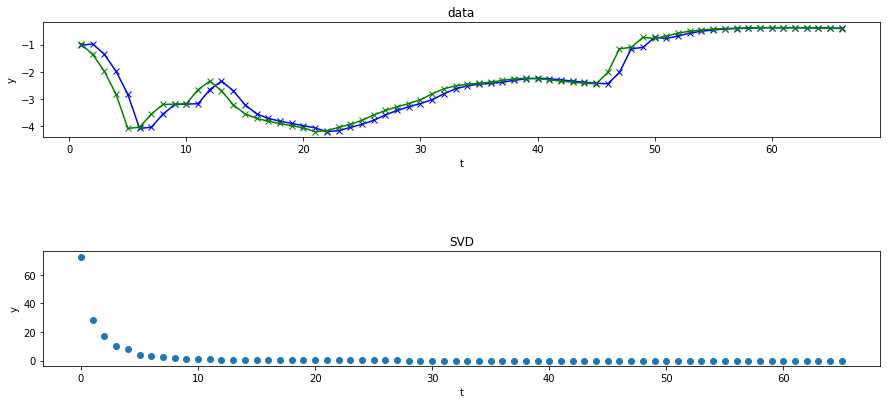

In [148]:
ax = []
plt.clf()
ax_count = 1
max_plot_num = 10
indx = 45
fig = plt.figure(figsize=(15, 40))
fig.subplots_adjust(hspace=1)

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('data')
ax[-1].plot(t[1:], X[indx, :], color='blue', label='Real', marker='x')
ax[-1].plot(t[1:], Y[indx,:], color='green', label='Complex', marker='x')
ax_count += 1

U2,Sig2,Vh2 = svd(X, False)
ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('SVD')
ax[-1].scatter(range(0, len(Sig2)), Sig2, label="SVD")
ax_count += 1

plt.savefig( 'output.png' )


In [149]:
from numpy import diag
from numpy import dot
from numpy.linalg import inv, eig, pinv
from scipy.linalg import diagsvd

# rank-3 truncation
r = 4
U = U2[:,:r]
Sig = np.matrix(diagsvd(Sig2[:r], r,r))
# Sig = Sig2[:r]
V = Vh2[:r,:]
print(U2.shape, U.shape)
print(Sig2.shape, Sig.shape)
print(Vh2.shape, V.shape)
re_data = np.asarray(U * Sig * V)

# build A tilde
# Atil = dot(dot(dot(U.conj().T, Y), V), inv(Sig))
# mu,W = eig(Atil)

# build DMD modes
# Phi = dot(dot(dot(Y, V), inv(Sig)), W)

(100, 66) (100, 4)
(66,) (4, 4)
(66, 66) (4, 66)


(100, 66)
(66,)
(66, 66)


/home/ayumu/Documents/MAZIN/DynamicModeDecomposition/myvenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/ayumu/Documents/MAZIN/DynamicModeDecomposition/myvenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/ayumu/Documents/MAZIN/DynamicModeDecomposition/myvenv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 432x288 with 0 Axes>

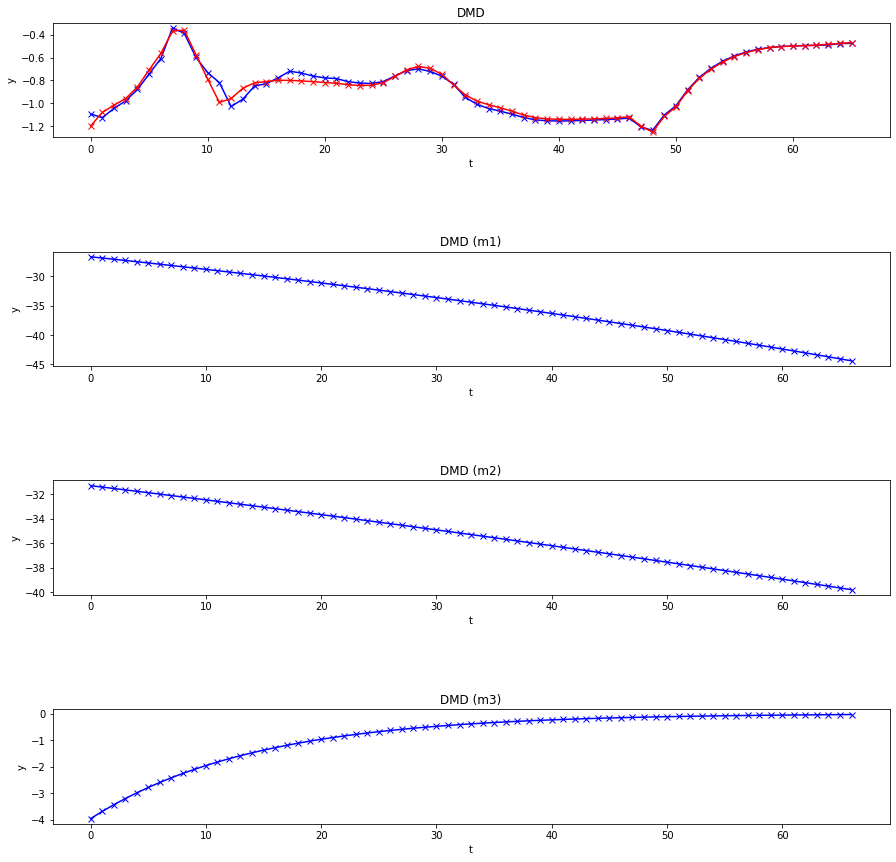

In [151]:
# compute time evolution
# b = dot(pinv(Phi), X[:,0])
# Psi = np.zeros([r, len(t)], dtype='complex')
# for i,_t in enumerate(t):
    # Psi[:,i] = np.multiply(np.power(mu, _t/1), b)

# 復元
print(U2.shape)
print(Sig2.shape)
print(Vh2.shape)
# re_data = np.dot(np.dot(U2, np.diag(Sig2)), Vh2)
re_data.shape

ax = []
plt.clf()
ax_count = 1
max_plot_num = 10
indx = 67
fig = plt.figure(figsize=(15, 40))
fig.subplots_adjust(hspace=1)

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('DMD')
ax[-1].plot(range(len(X[indx, :])), X[indx, :], color='blue', label='Original', marker='x')
ax[-1].plot(range(len(re_data[indx, :])), re_data[indx, :], color='red', label='Reproduce', marker='x')
ax_count += 1


ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('DMD (m1)')
ax[-1].plot(t, Psi[0,:], color='blue', label='Original', marker='x')
ax_count += 1

ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('DMD (m2)')
ax[-1].plot(t, Psi[1,:], color='blue', label='Original', marker='x')
ax_count += 1


ax.append(fig.add_subplot((max_plot_num), 1, ax_count))
ax[-1].set_xlabel('t')
ax[-1].set_ylabel('y')
ax[-1].set_title('DMD (m3)')
ax[-1].plot(t, Psi[2,:], color='blue', label='Original', marker='x')
ax_count += 1



plt.savefig( 'output.png' )